<a href="https://colab.research.google.com/github/hungvo2003vn/Computer-Vision/blob/Ass1/Project_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kết nối với drive

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import os
print("Current working directory:", os.getcwd())

Current working directory: /content/drive/My Drive/Colab Notebooks/Course Computer Vision/Assignment 1


In [14]:
# Set the new working directory
YOUR_PROJECT_LOCATION = '/content/drive/MyDrive/Colab Notebooks/Course Computer Vision/Assignment 1'
os.chdir(YOUR_PROJECT_LOCATION)

# Verify the change
print("Current working directory:", os.getcwd())


Current working directory: /content/drive/MyDrive/Colab Notebooks/Course Computer Vision/Assignment 1


In [15]:
# Chọn ảnh
picture_name = 'Cat1.jpg'
image_source = os.getcwd() + '/Images/' + picture_name
# Verify ảnh
print("Path ảnh đã chọn: ", image_source)

Path ảnh đã chọn:  /content/drive/MyDrive/Colab Notebooks/Course Computer Vision/Assignment 1/Images/Cat1.jpg


In [16]:
import numpy as np
import matplotlib.pyplot as plt

(-0.5, 999.5, 1057.5, -0.5)

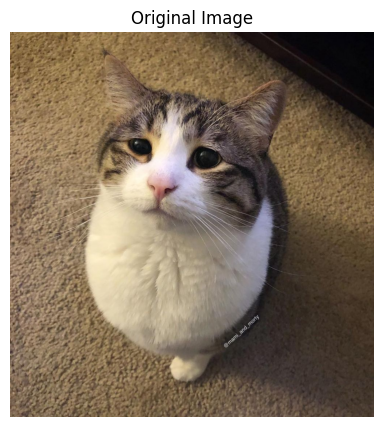

In [17]:
# Đọc ảnh màu
image_color = plt.imread(image_source)
plt.figure(figsize=(5, 5))
plt.imshow(image_color)
plt.title('Original Image')
plt.axis('off')

In [18]:
# Chuyển đổi sang ảnh xám
def rgb_to_gray(image_color):
    return np.dot(image_color[...,:3], [0.2989, 0.5870, 0.1140])

In [19]:
# # Chuyển đổi từ ảnh xám sang ảnh màu
# def gray_to_color(image_gray):
#     # Tạo ảnh màu từ ảnh xám bằng cách sao chép giá trị của ảnh xám vào tất cả các kênh màu (R, G, B)
#     height, width = image_gray.shape
#     this_image_color = np.zeros((height, width, 3), dtype=np.uint8)
#     for i in range(3):
#         this_image_color[:,:,i] = image_gray
#     return this_image_color

In [22]:
def gray_to_color(image_gray):
    # Tạo bảng màu cố định
    color_palette = [
        [0, 0, 0],     # Đen
        [255, 0, 0],   # Đỏ
        [0, 255, 0],   # Xanh lá cây
        [0, 0, 255],   # Xanh dương
        [255, 255, 255]  # Trắng
        # Thêm các màu khác tùy ý
    ]

    # Chia phạm vi giá trị của ảnh xám thành các khoảng tương ứng với số lượng màu trong bảng màu
    max_gray_value = np.max(image_gray)
    num_colors = len(color_palette)
    color_step = max_gray_value / (num_colors - 1)

    # Tạo ảnh màu từ ảnh xám
    height, width = image_gray.shape
    this_image_color = np.zeros((height, width, 3), dtype=np.uint8)
    for i in range(height):
        for j in range(width):
            gray_value = image_gray[i, j]
            color_index = int(gray_value / color_step)
            this_image_color[i, j] = color_palette[color_index]

    return this_image_color


In [23]:
# Chuyển đổi từ ảnh màu sang ảnh xám
image_gray = rgb_to_gray(image_color)

# Chuyển đổi từ ảnh xám sang ảnh màu
image_color_from_gray = gray_to_color(image_gray)

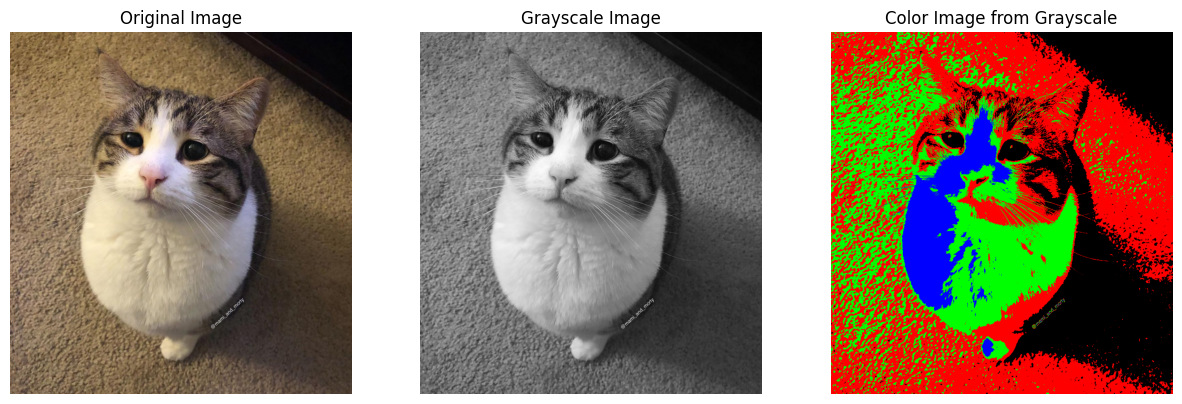

In [24]:
# Hiển thị ảnh gốc, ảnh xám và ảnh màu từ ảnh xám
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_color)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(image_color_from_gray)
plt.title('Color Image from Grayscale')
plt.axis('off')

plt.show()